In [3]:
"""
Question2: How many professional landlords are there?
This include:
1) Loads listings.csv from a relative path.
2) If not found, downloads from a given URL and saves locally.
3) Validates required columns.
4) Cleans host_total_listings_count to numeric.
5) Counts unique hosts whose total listings >= 2.
6) Prints a small summary.
"""

from pathlib import Path
import pandas as pd

# =========================
# Config
# =========================
RELATIVE_CSV_PATH = Path("listings.csv")   
DATA_URL = "YOUR_DATA_URL_HERE"           
PRO_THRESHOLD = 2                         


# =========================
# Helper functions
# =========================
def load_or_download_csv(path: Path, url: str | None = None) -> pd.DataFrame:
    """
    Load CSV from relative path.
    If missing and url provided, download and save.
    """
    if path.exists():
        return pd.read_csv(path)

    if not url or url == "YOUR_DATA_URL_HERE":
        raise FileNotFoundError(
            f"CSV not found at relative path: {path}. "
            "Provide a valid DATA_URL to auto-download."
        )

    print(f"[Info] {path} not found. Downloading from: {url}")
    df_tmp = pd.read_csv(url)

    path.parent.mkdir(parents=True, exist_ok=True)
    df_tmp.to_csv(path, index=False)
    print(f"[Info] Downloaded and saved to: {path}")
    return df_tmp


def require_columns(df: pd.DataFrame, cols: list[str]):
    """Raise a clear error if required columns are missing."""
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise ValueError(
            f"Missing required column(s): {missing}\n"
            f"Available columns: {list(df.columns)}"
        )


def count_professional_landlords(df: pd.DataFrame, threshold: int = 2) -> int:
    """
    Count unique hosts with host_total_listings_count >= threshold.
    Uses only the global total count column (方案一).
    """
    require_columns(df, ["host_id", "host_total_listings_count"])

    hosts = df[["host_id", "host_total_listings_count"]].drop_duplicates("host_id")

    hosts["host_total_listings_count"] = pd.to_numeric(
        hosts["host_total_listings_count"], errors="coerce"
    )

    hosts_clean = hosts.dropna(subset=["host_total_listings_count"])

    pro_hosts = hosts_clean[hosts_clean["host_total_listings_count"] >= threshold]
    return pro_hosts["host_id"].nunique()


def main():
    # 1) Load data
    df = load_or_download_csv(RELATIVE_CSV_PATH, DATA_URL)

    # 2) Count professional landlords
    pro_count = count_professional_landlords(df, PRO_THRESHOLD)

    # 3) Print summary
    total_hosts = df["host_id"].nunique() if "host_id" in df.columns else None

    print(f"Definition: professional landlord = host_total_listings_count >= {PRO_THRESHOLD}")
    if total_hosts is not None:
        print(f"Total unique hosts in dataset: {total_hosts}")
    print(f"Professional landlords: {pro_count}")
    if total_hosts is not None and total_hosts > 0:
        print(f"Share of professional landlords: {pro_count/total_hosts:.2%}")
   


if __name__ == "__main__":
    main()


Definition: professional landlord = host_total_listings_count >= 2
Total unique hosts in dataset: 55804
Professional landlords: 26921
Share of professional landlords: 48.24%


Total unique properties (listings) in dataset: 96,613
Total unique hosts in dataset: 55,770

========== Baseline Result ==========
Definition: professional landlord = host_total_listings_count >= 2
Professional landlords: 26,921 (48.27% of hosts)
Affected properties: 67,764 (70.14% of properties)


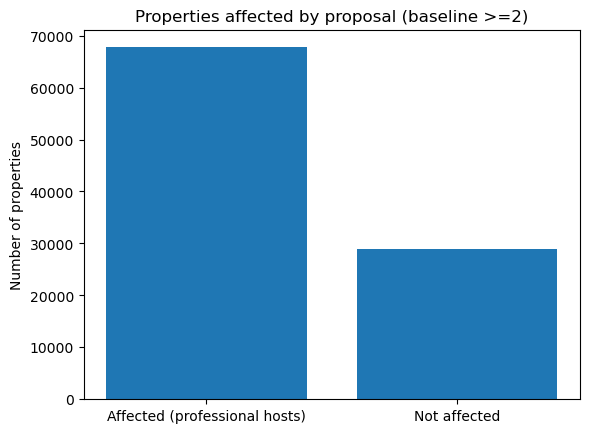

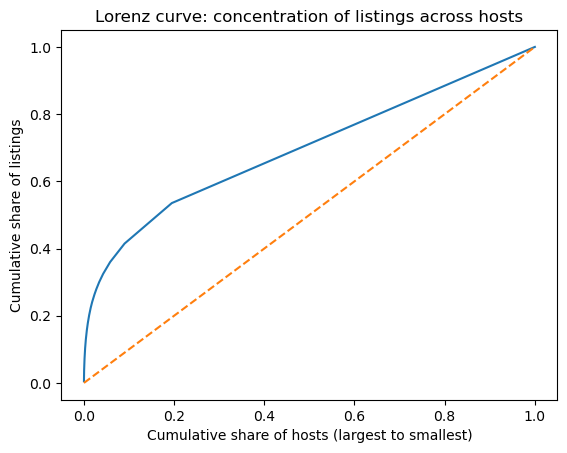

Top 1% of hosts control about 19.0% of listings in this dataset.
Top 5% of hosts control about 34.2% of listings in this dataset.
Top 10% of hosts control about 42.6% of listings in this dataset.

========== Size Tier Summary ==========
                num_hosts  num_listings  listing_share
tier                                                  
2–3 listings        17174         22904       0.237070
4–9 listings         7127         16274       0.168445
10–24 listings       1770         10398       0.107625
25+ listings          850         18188       0.188256


/tmp/ipykernel_1232/2947748287.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("tier")["host_id"].nunique()
/tmp/ipykernel_1232/2947748287.py:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("tier")["id"].nunique()


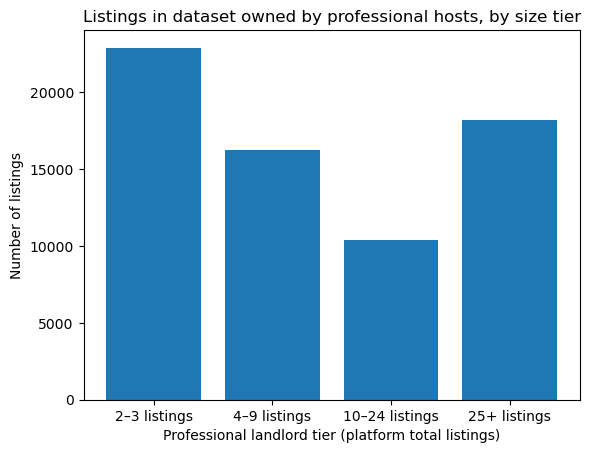


========== Room Type Comparison ==========
                 professional_share  non_professional_share
room_type                                                  
Entire home/apt            0.653798                0.628514
Hotel room                 0.001564                0.000173
Private room               0.342217                0.370377
Shared room                0.002420                0.000936


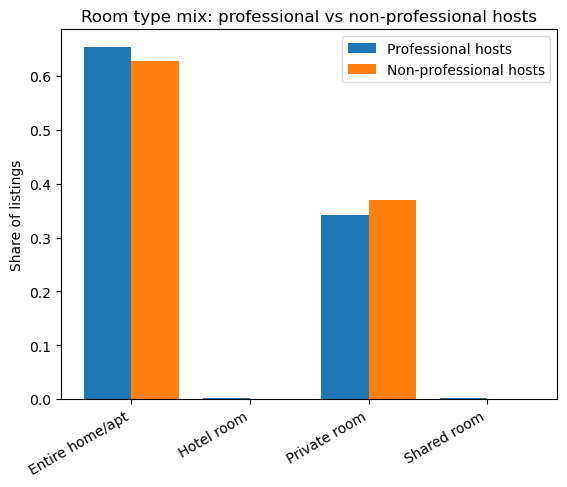


========== Top 10 Areas by Professional Share (neighbourhood_cleansed) ==========
                        total_listings  professional_listings  \
neighbourhood_cleansed                                          
Westminster                      11364                   9736   
City of London                     578                    492   
Kensington and Chelsea            6346                   5225   
Camden                            6561                   5123   
Brent                             3007                   2183   
Barnet                            2517                   1820   
Hammersmith and Fulham            4144                   2974   
Hillingdon                         948                    675   
Tower Hamlets                     7562                   5380   
Redbridge                         1042                    736   

                        professional_share  
neighbourhood_cleansed                      
Westminster                       0.856741  
C

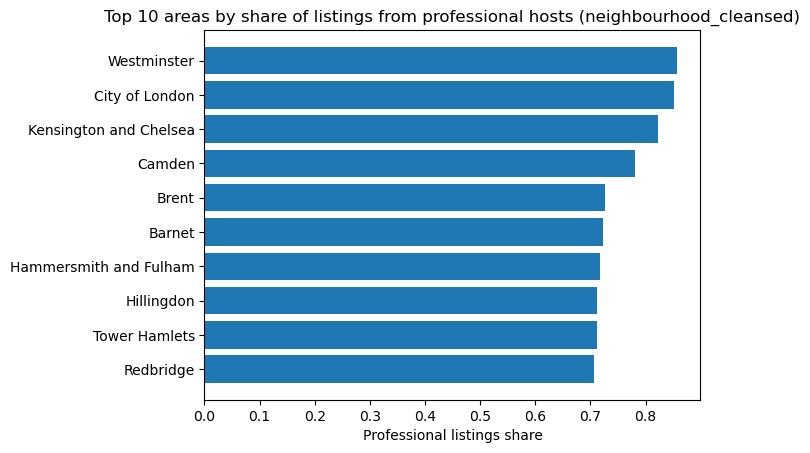


========== Price Band Summary ==========
            total_listings  professional_listings  professional_share
price_band                                                           
Low                  15692                  11956            0.761917
Mid-low              16089                  11699            0.727143
Mid-high             15388                  12069            0.784312
High                 15489                  13226            0.853896


/tmp/ipykernel_1232/2947748287.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("price_band")


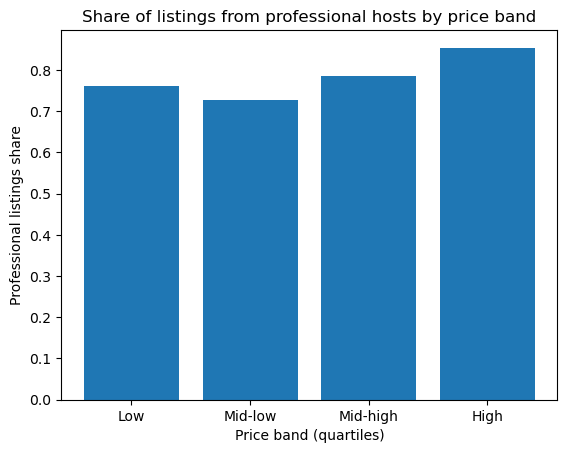


========== Robustness Checks ==========
Hosts with inconsistent host_total_listings_count values: 0
Affected properties (lower bound using MIN totals): 67,764
Affected properties (upper bound using MAX totals): 67,764

========== Fiscal Scenario (Illustrative) ==========
   assumed_uplift_per_property  annual_revenue_or_cost_impact
0                          300                       20329200
1                          600                       40658400
2                         1000                       67764000


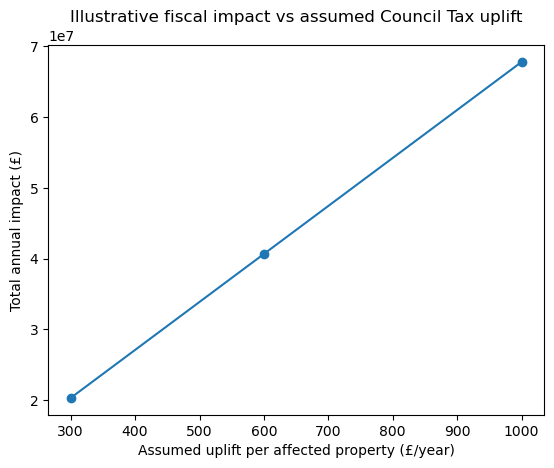


========== Threshold Sensitivity ==========
   threshold  professional_landlords  affected_properties
0          2                   26921                67764
1          3                   15145                52993
2          5                    6923                39815
3         10                    2620                28586


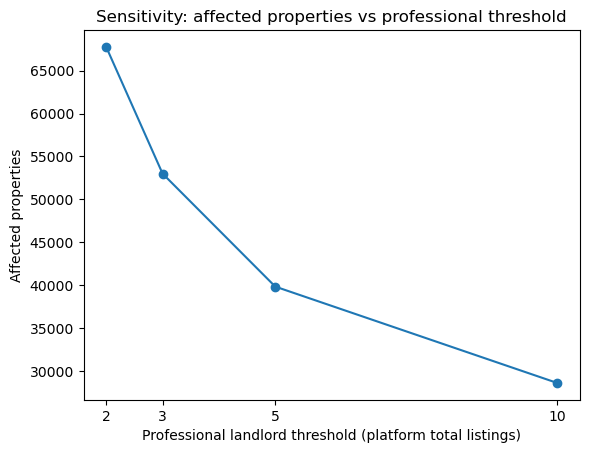

In [8]:
"""
# question3: How many properties would be affected by the opposition’s proposal?

**Political question.** The opposition proposes that **all professional landlords must register and pay higher Council Tax**.
We need to estimate:

> **How many Airbnb properties (listings) are owned by professional landlords?**
Those listings are the ones **affected by the proposal**.

**Core assumption (professional landlord).**
Because we are in an information-poor environment, we use the best available proxy:
> **professional landlord = host_total_listings_count >= 2**

`host_total_listings_count` is interpreted as the host's **total number of listings on the platform** (not just in this file).
This avoids undercounting professional hosts when the dataset is only a subset of London.

**What this notebook does (in logical policy order).**
1. Load data & validate required columns.
2. Baseline estimate: affected properties under the >=2 definition.
3. Concentration / Pareto: are a few large landlords driving the market?
4. Landlord size tiers: 2–3, 4–9, 10–24, 25+ listings.
5. Property type differences (e.g., Entire home vs Private room) if `room_type` exists.
6. Geography / neighbourhood hotspots if a location column exists.
7. Price-band impacts if `price` exists.
8. Robustness bounds:
   - host_total_listings_count consistency check
   - min / max host totals to create lower & upper bounds.
9. Fiscal scenario analysis (optional): illustrative Council Tax uplift scenarios.

"""

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# 0. Load data (relative path)
# -----------------------
data_path = Path("listings.csv")
df = pd.read_csv(data_path)

# -----------------------
# 1. Validate required columns
# -----------------------
required_cols = ["id", "host_id", "host_total_listings_count"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(
        f"Missing required columns: {missing}. "
        f"Available columns: {list(df.columns)}"
    )

# Make host_total_listings_count numeric and drop missing
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors="coerce")
df = df.dropna(subset=["host_total_listings_count"])

# Convenience totals
total_properties = df["id"].nunique()
total_hosts = df["host_id"].nunique()

print(f"Total unique properties (listings) in dataset: {total_properties:,}")
print(f"Total unique hosts in dataset: {total_hosts:,}")

# Host-level table (one row per host)
hosts = df[["host_id", "host_total_listings_count"]].drop_duplicates("host_id").copy()

# -----------------------
# 2. Baseline estimate (>=2 definition)
# -----------------------
BASE_THRESHOLD = 2
professional_hosts = hosts.loc[hosts["host_total_listings_count"] >= BASE_THRESHOLD, "host_id"]
num_professional_landlords = professional_hosts.nunique()

affected_df = df[df["host_id"].isin(professional_hosts)]
num_affected_properties = affected_df["id"].nunique()

share_professional_hosts = num_professional_landlords / total_hosts if total_hosts else 0
share_affected_properties = num_affected_properties / total_properties if total_properties else 0

print("\n========== Baseline Result ==========")
print(f"Definition: professional landlord = host_total_listings_count >= {BASE_THRESHOLD}")
print(f"Professional landlords: {num_professional_landlords:,} ({share_professional_hosts:.2%} of hosts)")
print(f"Affected properties: {num_affected_properties:,} ({share_affected_properties:.2%} of properties)")
print("=====================================")

# Plot: affected vs not affected
plt.figure()
plt.bar(
    ["Affected (professional hosts)", "Not affected"],
    [num_affected_properties, total_properties - num_affected_properties]
)
plt.title("Properties affected by proposal (baseline >=2)")
plt.ylabel("Number of properties")
plt.show()

# -----------------------
# 3. Concentration / Pareto analysis
# -----------------------
# We approximate the distribution of properties by host using the file's listings,
# but label hosts by platform totals for "size".
host_actual_counts = df.groupby("host_id")["id"].nunique().sort_values(ascending=False)

# Cumulative shares (Lorenz / Pareto)
cum_hosts = np.arange(1, len(host_actual_counts) + 1) / len(host_actual_counts)
cum_props = host_actual_counts.cumsum() / host_actual_counts.sum()

plt.figure()
plt.plot(cum_hosts, cum_props)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("Lorenz curve: concentration of listings across hosts")
plt.xlabel("Cumulative share of hosts (largest to smallest)")
plt.ylabel("Cumulative share of listings")
plt.show()

# Pareto points example
for p in [0.01, 0.05, 0.10]:
    idx = int(np.ceil(p * len(host_actual_counts)))
    share_props_top_p = host_actual_counts.iloc[:idx].sum() / host_actual_counts.sum()
    print(f"Top {p:.0%} of hosts control about {share_props_top_p:.1%} of listings in this dataset.")

# -----------------------
# 4. Landlord size tiers by platform totals
# -----------------------
# Define tiers on platform totals
bins = [2, 4, 10, 25, np.inf]
labels = ["2–3 listings", "4–9 listings", "10–24 listings", "25+ listings"]

hosts_tiered = hosts.copy()
hosts_tiered["tier"] = pd.cut(
    hosts_tiered["host_total_listings_count"],
    bins=bins, labels=labels, right=False
)

tier_summary = (
    hosts_tiered[hosts_tiered["host_total_listings_count"] >= 2]
    .groupby("tier")["host_id"].nunique()
    .rename("num_hosts")
    .to_frame()
)

# Count listings in file owned by those tiers
tier_listings = (
    df.merge(hosts_tiered[["host_id", "tier"]], on="host_id", how="left")
    .groupby("tier")["id"].nunique()
    .rename("num_listings")
    .to_frame()
)

tier_summary = tier_summary.join(tier_listings)
tier_summary["listing_share"] = tier_summary["num_listings"] / total_properties

print("\n========== Size Tier Summary ==========")
print(tier_summary)
print("======================================")

plt.figure()
plt.bar(tier_summary.index.astype(str), tier_summary["num_listings"])
plt.title("Listings in dataset owned by professional hosts, by size tier")
plt.xlabel("Professional landlord tier (platform total listings)")
plt.ylabel("Number of listings")
plt.show()

# -----------------------
# 5. Property type impacts (if room_type exists)
# -----------------------
if "room_type" in df.columns:
    type_prof = (
        affected_df.groupby("room_type")["id"].nunique() / num_affected_properties
    ).rename("professional_share")

    type_nonprof_df = df[~df["host_id"].isin(professional_hosts)]
    type_nonprof = (
        type_nonprof_df.groupby("room_type")["id"].nunique() / type_nonprof_df["id"].nunique()
    ).rename("non_professional_share")

    type_compare = pd.concat([type_prof, type_nonprof], axis=1).fillna(0)

    print("\n========== Room Type Comparison ==========")
    print(type_compare)
    print("==========================================")

    plt.figure()
    x = np.arange(len(type_compare.index))
    width = 0.4
    plt.bar(x - width/2, type_compare["professional_share"], width, label="Professional hosts")
    plt.bar(x + width/2, type_compare["non_professional_share"], width, label="Non-professional hosts")
    plt.xticks(x, type_compare.index, rotation=30, ha="right")
    plt.title("Room type mix: professional vs non-professional hosts")
    plt.ylabel("Share of listings")
    plt.legend()
    plt.show()
else:
    print("\n[Note] 'room_type' column not found; skipping property type analysis.")

# -----------------------
# 6. Geography hotspots (if neighbourhood/borough exists)
# -----------------------
geo_cols = [c for c in ["neighbourhood_cleansed", "borough", "neighbourhood", "city"] if c in df.columns]
if geo_cols:
    geo = geo_cols[0]

    geo_summary = (
        df.assign(is_professional=df["host_id"].isin(professional_hosts))
        .groupby(geo)
        .agg(
            total_listings=("id", "nunique"),
            professional_listings=("is_professional", "sum")
        )
    )
    geo_summary["professional_share"] = geo_summary["professional_listings"] / geo_summary["total_listings"]
    geo_top = geo_summary.sort_values("professional_share", ascending=False).head(10)

    print(f"\n========== Top 10 Areas by Professional Share ({geo}) ==========")
    print(geo_top)
    print("================================================================")

    plt.figure()
    plt.barh(geo_top.index.astype(str), geo_top["professional_share"])
    plt.title(f"Top 10 areas by share of listings from professional hosts ({geo})")
    plt.xlabel("Professional listings share")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("\n[Note] No geography column found; skipping area hotspot analysis.")

# -----------------------
# 7. Price band impacts (if price exists)
# -----------------------
if "price" in df.columns:
    # Clean price: remove currency symbols/commas if needed
    def clean_price(x):
        if pd.isna(x):
            return np.nan
        if isinstance(x, str):
            x = x.replace("£", "").replace("$", "").replace(",", "").strip()
        try:
            return float(x)
        except:
            return np.nan

    df["price_clean"] = df["price"].apply(clean_price)
    df_price = df.dropna(subset=["price_clean"]).copy()

    # Create price bands (quartiles)
    df_price["price_band"] = pd.qcut(df_price["price_clean"], 4, labels=["Low", "Mid-low", "Mid-high", "High"])

    price_summary = (
        df_price.assign(is_professional=df_price["host_id"].isin(professional_hosts))
        .groupby("price_band")
        .agg(
            total_listings=("id", "nunique"),
            professional_listings=("is_professional", "sum")
        )
    )
    price_summary["professional_share"] = price_summary["professional_listings"] / price_summary["total_listings"]

    print("\n========== Price Band Summary ==========")
    print(price_summary)
    print("=======================================")

    plt.figure()
    plt.bar(price_summary.index.astype(str), price_summary["professional_share"])
    plt.title("Share of listings from professional hosts by price band")
    plt.xlabel("Price band (quartiles)")
    plt.ylabel("Professional listings share")
    plt.show()
else:
    print("\n[Note] 'price' column not found; skipping price-band analysis.")

# -----------------------
# 8. Robustness bounds
# -----------------------
# 8.1 Consistency check: how many hosts show multiple different platform totals?
consistency = df.groupby("host_id")["host_total_listings_count"].nunique()
num_inconsistent_hosts = (consistency > 1).sum()
print("\n========== Robustness Checks ==========")
print(f"Hosts with inconsistent host_total_listings_count values: {num_inconsistent_hosts:,}")

# 8.2 Lower/upper bounds using min vs max platform total per host
host_totals_min = df.groupby("host_id")["host_total_listings_count"].min()
host_totals_max = df.groupby("host_id")["host_total_listings_count"].max()

pro_hosts_min = host_totals_min[host_totals_min >= BASE_THRESHOLD].index
pro_hosts_max = host_totals_max[host_totals_max >= BASE_THRESHOLD].index

affected_min = df[df["host_id"].isin(pro_hosts_min)]["id"].nunique()
affected_max = df[df["host_id"].isin(pro_hosts_max)]["id"].nunique()

print(f"Affected properties (lower bound using MIN totals): {affected_min:,}")
print(f"Affected properties (upper bound using MAX totals): {affected_max:,}")
print("=======================================")

# -----------------------
# 9. Fiscal scenario analysis (illustrative)
# -----------------------
uplift_scenarios = [300, 600, 1000]  # £ per property per year (assumptions)
fiscal = pd.DataFrame({
    "assumed_uplift_per_property": uplift_scenarios,
    "annual_revenue_or_cost_impact": [num_affected_properties * u for u in uplift_scenarios]
})

print("\n========== Fiscal Scenario (Illustrative) ==========")
print(fiscal)
print("===================================================")

plt.figure()
plt.plot(fiscal["assumed_uplift_per_property"], fiscal["annual_revenue_or_cost_impact"], marker="o")
plt.title("Illustrative fiscal impact vs assumed Council Tax uplift")
plt.xlabel("Assumed uplift per affected property (£/year)")
plt.ylabel("Total annual impact (£)")
plt.show()

# -----------------------
# 10. Sensitivity to professional threshold (2,3,5,10)
# -----------------------
thresholds = [2, 3, 5, 10]
affected_by_t = []
hosts_by_t = []

for t in thresholds:
    pro_hosts_t = hosts.loc[hosts["host_total_listings_count"] >= t, "host_id"]
    affected_t = df[df["host_id"].isin(pro_hosts_t)]["id"].nunique()
    hosts_by_t.append(pro_hosts_t.nunique())
    affected_by_t.append(affected_t)

sens_df = pd.DataFrame({
    "threshold": thresholds,
    "professional_landlords": hosts_by_t,
    "affected_properties": affected_by_t
})

print("\n========== Threshold Sensitivity ==========")
print(sens_df)
print("==========================================")

plt.figure()
plt.plot(sens_df["threshold"], sens_df["affected_properties"], marker="o")
plt.title("Sensitivity: affected properties vs professional threshold")
plt.xlabel("Professional landlord threshold (platform total listings)")
plt.ylabel("Affected properties")
plt.xticks(thresholds)
plt.show()
